In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#file managment
import os 

import cv2

#progress bar
from tqdm import tqdm

import random 

DATADIR = 'C:/Users/kubas/Desktop/paintings'

In [174]:
metadata = pd.read_csv('paintings.csv', sep = '&', encoding ='utf-8', index_col = 0) 

#retruns image title based on id that is in the directory
def get_image_title(image_url):
    return metadata[metadata['ID'] == int(image_url.split('.')[0])].values[0,0]

def convert_image(image):
    ''' Changes BGR to RGB'''
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_random_image(N = 1):
    for _ in range(N):
        r = random.randint(0, 1800)
        print(labels[r])
        plt.axis("off")
        plt.imshow(convert_image(X[r]))
        plt.show()

In [179]:
X = []
labels = [] 
# to change if more computing power
IMG_SIZE = 224

# to see which one are not working
exceptions = []

for image in tqdm(os.listdir(DATADIR)):
    try:
        X.append(cv2.resize(cv2.imread(os.path.join(DATADIR, image)), (IMG_SIZE, IMG_SIZE)))
        labels.append(get_image_title(image))
    except:
        exceptions.append(image)

# reshaping data
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

100%|████████████████████████████████████████████████████| 1843/1843 [06:19<00:00,  4.86it/s]


Trzej Aniołowie u Abrahama


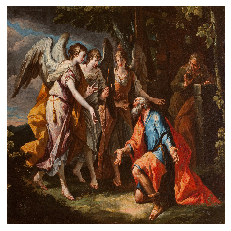

Cyganka


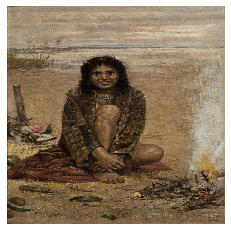

Stara kobieta


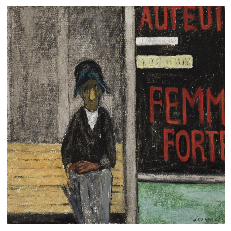

Portret Kazimierza Chłędowskiego


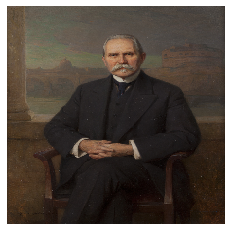

Dolina Wisły widziana ze Zwierzyńca


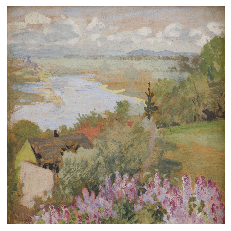

Keruan (Podwórze meczetu "Miecza")


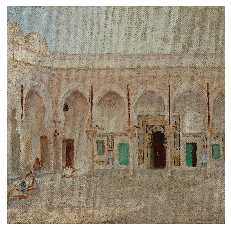

In [180]:
show_random_image(6)

In [184]:
#saving data for further use
np.save('X_data.npy', X)
np.save('labels_data.npy', np.array(labels))